# Modulo 1 - Desafios

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
dados = pd.read_csv("/content/A160324189_28_143_208.csv", encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",")
dados.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,9.291297e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,4.206680e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1.771655e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,3.050109e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4.437116e+09


In [3]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
usaveis = usaveis.drop("Total", axis=1)
usaveis.T.tail()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2020/Mar,7174312.31,2859102.06,14773739.41,2813954.05,34749098.46,2286241.46,7025821.12,28832662.46,15318975.43,46395356.97,20936692.02,17607478.01,59628674.07,15998721.86,9193248.73,70340301.29,1.470786e+08,26555688.68,73594497.93,2.766063e+08,1.144770e+08,56709962.09,84651396.59,17357008.80,14444207.60,34558308.52,19405446.88
2020/Abr,7423678.64,2472063.08,16330913.81,2304961.42,28714969.96,1774558.12,6204453.42,23938156.77,11878587.16,43468816.62,17319947.66,15386630.89,53843729.23,14241361.44,8395906.57,59109689.20,1.263306e+08,23735724.64,68160773.35,2.516964e+08,9.672711e+07,51179993.45,76294596.96,15652772.51,11943713.53,27499307.93,18123899.78
2020/Mai,8581195.13,2383895.48,19441150.53,2910776.44,41248502.78,2701014.87,6732370.56,32979447.97,14175053.45,54200339.48,19916570.52,18970543.57,65424719.40,15254204.31,8450209.57,61756775.71,1.368673e+08,28614683.75,86281033.16,3.028577e+08,1.061037e+08,56843604.33,86076113.42,16703851.10,13981483.29,31870107.62,21437430.22
2020/Jun,9193593.76,2199920.70,17509334.66,3216466.51,35396030.78,2699492.23,5018138.13,31128144.66,15375523.59,42146555.81,20219961.81,19666096.87,68145110.59,14278872.07,6705923.03,65159300.63,1.359776e+08,27450865.16,77604925.21,2.990609e+08,9.290146e+07,56503747.99,89019478.82,15838659.34,14585009.42,34437633.20,23479773.03
2020/Jul,7407388.24,1163813.08,13358514.02,2739498.41,27618727.51,2155083.37,4489665.87,24374205.15,18019214.49,30809221.22,19593057.45,15491469.06,62325444.34,13087850.40,3312766.32,58898100.40,1.204672e+08,27460475.47,71540227.33,2.827096e+08,8.032085e+07,51764534.76,78929703.81,12508717.35,13083151.70,33499284.38,22233542.26


##Desafio 05: Escolher uma palete de cores mais adequada do matplotlib.

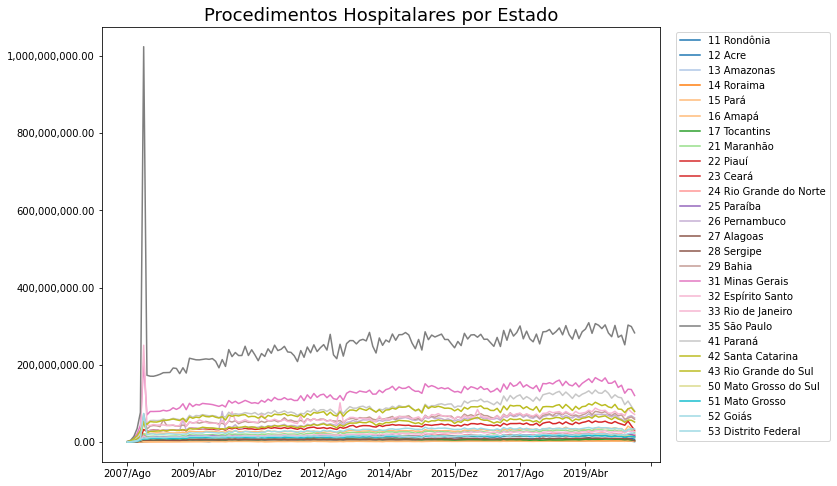

In [4]:
ax = usaveis.T.plot(figsize=(10,8), colormap = "tab20")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title('Procedimentos Hospitalares por Estado', fontsize=18)
plt.legend(loc='upper left', bbox_to_anchor =(1.02,1))


##Desafio 06: Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado

In [5]:
lista_uf = usaveis.index.tolist()
lista_uf

['11 Rondônia',
 '12 Acre',
 '13 Amazonas',
 '14 Roraima',
 '15 Pará',
 '16 Amapá',
 '17 Tocantins',
 '21 Maranhão',
 '22 Piauí',
 '23 Ceará',
 '24 Rio Grande do Norte',
 '25 Paraíba',
 '26 Pernambuco',
 '27 Alagoas',
 '28 Sergipe',
 '29 Bahia',
 '31 Minas Gerais',
 '32 Espírito Santo',
 '33 Rio de Janeiro',
 '35 São Paulo',
 '41 Paraná',
 '42 Santa Catarina',
 '43 Rio Grande do Sul',
 '50 Mato Grosso do Sul',
 '51 Mato Grosso',
 '52 Goiás',
 '53 Distrito Federal']

In [6]:
regioes=[]
for uf in range(len(lista_uf)):
  if lista_uf[uf].startswith('1'):
    regioes.append('Norte')
  elif lista_uf[uf].startswith('2'):
    regioes.append('Nordeste')
  elif lista_uf[uf].startswith('3'):
    regioes.append('Sudeste')
  elif lista_uf[uf].startswith('4'):
    regioes.append('Sul')
  else:
    regioes.append('Centro-Oeste')        

In [7]:
usaveis['Regioes'] = regioes

In [8]:
usaveis

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Regioes
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1.829560e+06,1.940793e+06,1.955722e+06,2.143354e+06,2.280383e+06,2.624543e+06,2.973421e+06,2.938286e+06,2.843931e+06,2.878153e+06,2.780023e+06,2.651805e+06,3.147566e+06,3.082108e+06,4.190355e+06,4.040252e+06,3.946424e+06,3.372378e+06,3.720609e+06,3.787323e+06,3.679370e+06,3.866147e+06,3.667809e+06,3.633472e+06,3.812316e+06,3.911776e+06,4.663061e+06,4.524545e+06,4.778755e+06,4.369733e+06,4.632439e+06,4.464307e+06,4.668642e+06,4.490368e+06,4.423840e+06,...,8.140639e+06,8.041249e+06,8.199033e+06,8.363386e+06,7.889820e+06,8.603944e+06,8.048398e+06,8.159737e+06,8.457456e+06,7.766983e+06,8.858846e+06,8.407076e+06,9.492939e+06,8.206196e+06,9.011613e+06,9.124968e+06,8.406733e+06,8.411360e+06,8.651082e+06,8.193426e+06,8.388269e+06,8.645316e+06,9.050329e+06,9.211263e+06,9.490545e+06,8.600886e+06,8.919191e+06,8.909112e+06,8.409386e+06,8.924348e+06,8.948606e+06,8.660753e+06,8.326416e+06,8.413784e+06,7.174312e+06,7.423679e+06,8.581195e+06,9.193594e+06,7.407388e+06,Norte
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1.731745e+06,1.743979e+06,2.057439e+06,2.057830e+06,2.226578e+06,2.112577e+06,2.029128e+06,1.886872e+06,2.084885e+06,2.230838e+06,2.122013e+06,2.196652e+06,2.152239e+06,2.086776e+06,2.476364e+06,2.396888e+06,2.610262e+06,2.174098e+06,2.051885e+06,1.714708e+06,1.341532e+06,2.288459e+06,2.462713e+06,2.254900e+06,2.381536e+06,2.079981e+06,2.564838e+06,2.588318e+06,2.538526e+06,2.319786e+06,2.279157e+06,2.454599e+06,2.578924e+06,2.625443e+06,2.512995e+06,...,3.161447e+06,3.355223e+06,3.562692e+06,3.375297e+06,3.341498e+06,3.358378e+06,3.145385e+06,2.638774e+06,2.968169e+06,2.769797e+06,3.057632e+06,2.874965e+06,3.175575e+06,3.060903e+06,3.253012e+06,3.040645e+06,2.926179e+06,3.126121e+06,2.473455e+06,2.277493e+06,2.594347e+06,2.234388e+06,2.473008e+06,2.979765e+06,3.070534e+06,3.249053e+06,3.567539e+06,2.981073e+06,2.998860e+06,3.293379e+06,3.174249e+06,2.959569e+06,3.261124e+06,2.981264e+06,2.859102e+06,2.472063e+06,2.383895e+06,2.199921e+06,1.163813e+06,Norte
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,1.141921e+07,7.934652e+06,8.641517e+06,8.531576e+06,9.079902e+06,8.646296e+06,8.755806e+06,8.331764e+06,8.148090e+06,7.681661e+06,7.761445e+06,7.764783e+06,8.607223e+06,8.385963e+06,9.207129e+06,8.160517e+06,8.562322e+06,9.484999e+06,9.465069e+06,9.267007e+06,9.092824e+06,9.218407e+06,8.674068e+06,8.365788e+06,9.386945e+06,8.373049e+06,1.032115e+07,9.990164e+06,9.767161e+06,9.151838e+06,9.140197e+06,9.437224e+06,9.742680e+06,9.996686e+06,9.532878e+06,...,1.390957e+07,1.371883e+07,1.439621e+07,1.374530e+07,1.397979e+07,1.389552e+07,1.351812e+07,1.363519e+07,1.454945e+07,1.275356e+07,1.474941e+07,1.457793e+07,1.538106e+07,1.465365e+07,1.554460e+07,1.637496e+07,1.534334e+07,1.624996e+07,1.425541e+07,1.427405e+07,1.535891e+07,1.410007e+07,1.610397e+07,1.615449e+07,1.652998e+07,1.550998e+07,1.664222e+07,1.649372e+07,1.534632e+07,1.628244e+07,1.478133e+07,1.492338e+07,1.593956e+07,1.513811e+07,1.477374e+07,1.633091e+07,1.944115e+07,1.750933e+07,1.335851e+07,Norte
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,8.084484e+05,7.716878e+05

## Desafio 07: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável

In [9]:
usaveis["Total"] = usaveis.sum(axis=1)


In [10]:
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)
ordenado_por_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Regioes
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.023565e+09,1.728349e+08,1.704818e+08,1.702783e+08,1.724022e+08,1.754166e+08,1.795250e+08,1.798981e+08,1.800822e+08,1.916852e+08,1.905397e+08,1.770864e+08,1.923216e+08,1.785964e+08,2.169516e+08,2.150530e+08,2.128902e+08,2.126709e+08,2.140412e+08,2.152125e+08,2.141354e+08,2.160566e+08,2.089739e+08,1.921271e+08,2.134679e+08,1.957848e+08,2.393239e+08,2.211730e+08,2.317775e+08,2.239338e+08,2.240679e+08,2.480101e+08,2.240530e+08,2.389355e+08,2.254841e+08,...,2.921134e+08,2.743011e+08,2.835346e+08,3.005937e+08,2.672972e+08,2.871148e+08,2.671132e+08,2.594517e+08,2.794976e+08,2.540046e+08,2.852706e+08,2.861920e+08,2.914409e+08,2.789260e+08,2.858519e+08,2.954193e+08,2.775762e+08,3.014549e+08,2.781143e+08,2.662398e+08,2.910814e+08,2.676625e+08,2.855763e+08,2.925848e+08,3.089256e+08,2.814051e+08,3.066340e+08,3.023673e+08,2.936857e+08,3.033825e+08,2.823918e+08,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08,Sudeste
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.059127e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.960865e+07,8.220022e+07,8.037412e+07,8.240015e+07,8.861348e+07,8.448700e+07,8.892863e+07,9.901816e+07,8.367512e+07,1.002407e+08,9.183133e+07,9.728970e+07,9.572340e+07,1.000500e+08,9.896806e+07,9.820212e+07,9.696239e+07,9.476764e+07,9.241277e+07,9.580656e+07,9.076489e+07,1.073899e+08,1.008298e+08,1.054856e+08,9.966612e+07,1.033570e+08,1.078443e+08,1.043411e+08,1.005254e+08,1.019436e+08,...,1.534121e+08,1.442914e+08,1.475335e+08,1.560556e+08,1.422851e+08,1.483061e+08,1.423239e+08,1.383412e+08,1.465016e+08,1.307021e+08,1.514962e+08,1.506876e+08,1.535893e+08,1.502518e+08,1.566340e+08,1.604200e+08,1.459410e+08,1.572476e+08,1.481728e+08,1.453872e+08,1.531773e+08,1.426692e+08,1.519436e+08,1.579226e+08,1.635915e+08,1.541148e+08,1.667357e+08,1.617078e+08,1.574197e+08,1.661338e+08,1.521067e+08,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08,Sudeste
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,5.609475e+07,5.980240e+07,5.669900e+07,5.809199e+07,6.136594e+07,5.966721e+07,5.781620e+07,6.038159e+07,5.723910e+07,6.907049e+07,6.405468e+07,6.868554e+07,6.793123e+07,7.095876e+07,6.922578e+07,6.784997e+07,6.855821e+07,6.715850e+07,6.309427e+07,6.690264e+07,6.450113e+07,7.713887e+07,7.075540e+07,7.345676e+07,7.183902e+07,7.301383e+07,7.615101e+07,7.424096e+07,7.304239e+07,7.636475e+07,...,1.205353e+08,1.117253e+08,1.185902e+08,1.221228e+08,1.106561e+08,1.175677e+08,1.124575e+08,1.055581e+08,1.161332e+08,1.070760e+08,1.223314e+08,1.247313e+08,1.270739e+08,1.226169e+08,1.279919e+08,1.312572e+08,1.206474e+08,1.295302e+08,1.218107e+08,1.129846e+08,1.241592e+08,1.177155e+08,1.239074e+08,1.274470e+08,1.325766e+08,1.248583e+08,1.346213e+08,1.271741e+08,1.261727e+08,1.338480e+08,1.262094e+08,1.135453e+08,1.222688e+08,1.160616e+08,1.144770e+08,9.672711e+07,1.061037e+08,9.290146e+07,8.032085e+07,Sul
43 Rio Grande do Sul,1049252.33,3182913.14,857

In [11]:
colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]
ordenado_por_total

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Regioes
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1.728349e+08,1.704818e+08,1.702783e+08,1.724022e+08,1.754166e+08,1.795250e+08,1.798981e+08,1.800822e+08,1.916852e+08,1.905397e+08,1.770864e+08,1.923216e+08,1.785964e+08,2.169516e+08,2.150530e+08,2.128902e+08,2.126709e+08,2.140412e+08,2.152125e+08,2.141354e+08,2.160566e+08,2.089739e+08,1.921271e+08,2.134679e+08,1.957848e+08,2.393239e+08,2.211730e+08,2.317775e+08,2.239338e+08,2.240679e+08,2.480101e+08,2.240530e+08,2.389355e+08,2.254841e+08,2.106115e+08,2.290870e+08,2.215980e+08,2.413999e+08,2.298212e+08,2.507936e+08,...,2.921134e+08,2.743011e+08,2.835346e+08,3.005937e+08,2.672972e+08,2.871148e+08,2.671132e+08,2.594517e+08,2.794976e+08,2.540046e+08,2.852706e+08,2.861920e+08,2.914409e+08,2.789260e+08,2.858519e+08,2.954193e+08,2.775762e+08,3.014549e+08,2.781143e+08,2.662398e+08,2.910814e+08,2.676625e+08,2.855763e+08,2.925848e+08,3.089256e+08,2.814051e+08,3.066340e+08,3.023673e+08,2.936857e+08,3.033825e+08,2.823918e+08,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08,Sudeste
31 Minas Gerais,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.960865e+07,8.220022e+07,8.037412e+07,8.240015e+07,8.861348e+07,8.448700e+07,8.892863e+07,9.901816e+07,8.367512e+07,1.002407e+08,9.183133e+07,9.728970e+07,9.572340e+07,1.000500e+08,9.896806e+07,9.820212e+07,9.696239e+07,9.476764e+07,9.241277e+07,9.580656e+07,9.076489e+07,1.073899e+08,1.008298e+08,1.054856e+08,9.966612e+07,1.033570e+08,1.078443e+08,1.043411e+08,1.005254e+08,1.019436e+08,9.953895e+07,1.077389e+08,1.031408e+08,1.110660e+08,1.060943e+08,1.154872e+08,...,1.534121e+08,1.442914e+08,1.475335e+08,1.560556e+08,1.422851e+08,1.483061e+08,1.423239e+08,1.383412e+08,1.465016e+08,1.307021e+08,1.514962e+08,1.506876e+08,1.535893e+08,1.502518e+08,1.566340e+08,1.604200e+08,1.459410e+08,1.572476e+08,1.481728e+08,1.453872e+08,1.531773e+08,1.426692e+08,1.519436e+08,1.579226e+08,1.635915e+08,1.541148e+08,1.667357e+08,1.617078e+08,1.574197e+08,1.661338e+08,1.521067e+08,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08,Sudeste
41 Paraná,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,5.609475e+07,5.980240e+07,5.669900e+07,5.809199e+07,6.136594e+07,5.966721e+07,5.781620e+07,6.038159e+07,5.723910e+07,6.907049e+07,6.405468e+07,6.868554e+07,6.793123e+07,7.095876e+07,6.922578e+07,6.784997e+07,6.855821e+07,6.715850e+07,6.309427e+07,6.690264e+07,6.450113e+07,7.713887e+07,7.075540e+07,7.345676e+07,7.183902e+07,7.301383e+07,7.615101e+07,7.424096e+07,7.304239e+07,7.636475e+07,7.051764e+07,7.471278e+07,7.131474e+07,7.691467e+07,7.423294e+07,8.170902e+07,...,1.205353e+08,1.117253e+08,1.185902e+08,1.221228e+08,1.106561e+08,1.175677e+08,1.124575e+08,1.055581e+08,1.161332e+08,1.070760e+08,1.223314e+08,1.247313e+08,1.270739e+08,1.226169e+08,1.279919e+08,1.312572e+08,1.206474e+08,1.295302e+08,1.218107e+08,1.129846e+08,1.241592e+08,1.177155e+08,1.239074e+08,1.274470e+08,1.325766e+08,1.248583e+08,1.346213e+08,1.271741e+08,1.261727e+08,1.338480e+08,1.262094e+08,1.135453e+08,1.222688e+08,1.160616e+08,1.144770e+08,9.672711e+07,1.061037e+08,9.290146e+07,8.032085e+07,Sul
43 Rio Grande do Sul,4

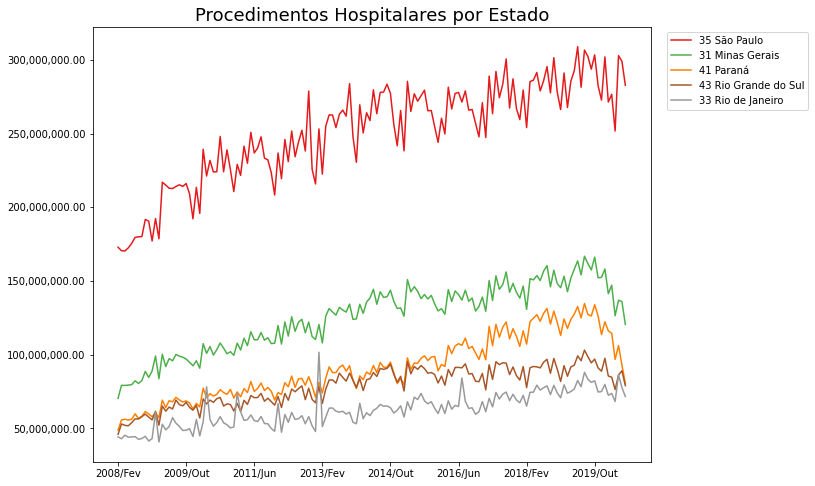

In [12]:
ax = ordenado_por_total.head(5).T[:-1].plot(figsize=(10,8), colormap = "Set1")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title('Procedimentos Hospitalares por Estado', fontsize=18)
plt.legend(loc='upper left', bbox_to_anchor =(1.02,1))
plt.show()

## Desafio 09:  Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue

fonte: https://www.prefeitura.sp.gov.br/cidade/secretarias/saude/vigilancia_em_saude/index.php?p=245603

Segundo fonte de pesquisa no site da prefeitura de SP não há evidências que os picos apresentados são referentes a dengue. Porém existe similaridade no crescimento da curva com o passar dos anos, em relação aos dados apresentados na prefeitura de SP e em nosso Dataset.

